# Using TopOMetry's classes: Kernel, EigenDecomposition and Project 

This tutorial covers how to use TopOMetry's classes on their own. It covers the `Kernel`, `IntrinsicDim`, `EigenDecomposition` and `Project` classes:
- `Kernel`: similarity-learning and graph operators;
- `IntrinsicDim`: estimating intrinsic dimensionalities;
- `EigenDecomposition`: eigendecomposition of kernel matrices and graph operators;
- `Project`: wrapper for several graph projection and layout optimization methods.


## The Kernel class

We will start with the `Kernel` class. The `Kernel` class handles similarity learning and graph operators within TopOMetry, and integrates well with other libraries for graph analysis such as `pyGSP`, `igraph` and `networkx`.

Here, we'll again use the MNIST digits dataset to illustrate how to use `Kernel` on its own. This same data will be used afterwards to illustrate how to use `EigenDecomposition` and `Project` both with the `Kernel` class and with numpy arrays or scipy sparse matrices.

Specifically, we'll cover how to use it for:
- Similarity learning and indirect measures of neighborhood density
- Graph Laplacians
- Diffusion operators
- Graph sparsification
- Signal filtering

In the first [single-cell tutorial](), we'll also cover how to use it for signal interpolation and imputation - for that, we need data and metadata in a different format than MNIST.

First, we'll load some libraries:

In [1]:
# Load some libraries:
import numpy as np
import topo as tp

# Scikit-learn utilities
from sklearn.datasets import load_digits

# Matplotlib for plotting:
from matplotlib import pyplot as plt
%matplotlib inline

Load the data:

In [2]:
# Load the digits data and the labels:
X, labels = load_digits(return_X_y=True)

### Set up a Kernel object

Now set up a `Kernel()` object and see what's inside it:

In [3]:
my_kernel = tp.tpgraph.Kernel(n_neighbors=10, n_jobs=-1, metric='euclidean')
my_kernel.fit(X)

/home/davi/.local/lib/python3.10/site-packages/topo/base/ann.py:110: UserWarning: nmslib does not support dense matrices. Converting to array...
  warn("nmslib does not support dense matrices. Converting to array...")


Kernel() estimator fitted with 1797 samples and 64 observations using a kernel with adaptive bandwidth 

NOTE: The `results()` method returns the kernel matrix.

We can easily access graph properties from this object:
- k-nearest neighbors distance matrix:

In [4]:
# The k-nearest-neighbors distance matrix:
my_kernel.knn

<1797x1797 sparse matrix of type '<class 'numpy.float32'>'
	with 19767 stored elements in Compressed Sparse Row format>

- kernel matrix:

In [5]:
# The kernel matrix:
my_kernel.K

<1797x1797 sparse matrix of type '<class 'numpy.float64'>'
	with 24670 stored elements in Compressed Sparse Row format>

- the graph Laplacian:

(by default uses normalized Laplacian)

In [6]:
# The graph Laplacian:
my_kernel.L

<1797x1797 sparse matrix of type '<class 'numpy.float64'>'
	with 26467 stored elements in Compressed Sparse Row format>

- the graph diffusion operator:

(by default uses anisotropic diffusion)

In [7]:
# The diffusion operator:
my_kernel.P

<1797x1797 sparse matrix of type '<class 'numpy.float64'>'
	with 24670 stored elements in Compressed Sparse Row format>

- pairwise geodesic distances:

In [8]:
# Pairwise geodesic distances (shortest-paths):
my_kernel.SP

array([[0.        , 1.34784609, 1.16596092, ..., 1.36361775, 1.17346114,
        1.3118559 ],
       [1.34784609, 0.        , 0.53407796, ..., 0.53623266, 1.13286667,
        0.71199205],
       [1.16596092, 0.53407796, 0.        , ..., 0.51896599, 0.99447262,
        0.69472537],
       ...,
       [1.36361775, 0.53623266, 0.51896599, ..., 0.        , 0.71075836,
        0.17575939],
       [1.17346114, 1.13286667, 0.99447262, ..., 0.71075836, 0.        ,
        0.53499897],
       [1.3118559 , 0.71199205, 0.69472537, ..., 0.17575939, 0.53499897,
        0.        ]])

### Visualize the kernel and graph operators:

We can try to visualize the kernel and the graph operators based on their sparsity structure. Using `matplotlib.pyplot.matshow` or similar functions to plot the actual values can be *quite* computationally expensive.

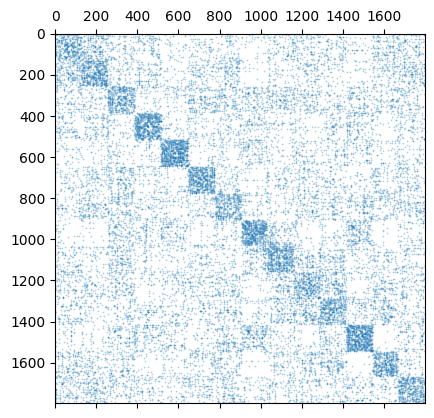

In [9]:
plt.spy(my_kernel.K, markersize=0.1)

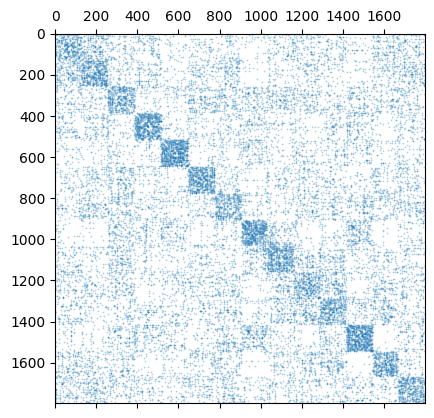

In [10]:
plt.spy(my_kernel.P, markersize=0.1)

### Filter signals

We can also perform filtering on a given signal. For example, we may want to assess the density of a given class of digits throghout the graph. We could also have samples from two different sources and want to evaluate their distribution in the graph - this is quite useful in single-cell genomics and is what happens in [MELD](https://github.com/KrishnaswamyLab/MELD).
 Like the `sparsify()` method, this also calls [pyGSP](https://pygsp.readthedocs.io/en/stable/reference/filters.html#module-pygsp.filters).

In [11]:
label_densities = my_kernel.filter(labels)
label_densities

,0,1,2,3,4,5,6,7,8,9
0,0.005433,0.000004,0.000064,0.000017,0.000036,0.000007,0.000044,0.000002,0.000004,0.000004
1,0.000005,0.003758,0.000179,0.000079,0.000294,0.000125,0.000084,0.000071,0.000775,0.000169
2,0.000013,0.000977,0.002757,0.000181,0.000151,0.000052,0.000048,0.000106,0.001181,0.000160
3,0.000022,0.000064,0.000087,0.003876,0.000013,0.000272,0.000048,0.000073,0.000434,0.000614
4,0.000054,0.000268,0.000029,0.000009,0.004931,0.000056,0.000029,0.000049,0.000051,0.000051
...,...,...,...,...,...,...,...,...,...,...
1792,0.000006,0.000070,0.000047,0.000607,0.000018,0.000340,0.000020,0.000047,0.000344,0.004054
1793,0.005344,0.000007,0.000084,0.000020,0.000086,0.000009,0.000052,0.000003,0.000006,0.000005
1794,0.000004,0.001468,0.000241,0.000268,0.000078,0.000103,0.000103,0.000158,0.002965,0.000250
1795,0.000005,0.000136,0.000081,0.000546,0.000023,0.000307,0.000022,0.000060,0.000793,0.003595


### Interpolation and imputation

The interpolation and imputation utilities will be showcased in another tutorial, as they'll be of little to no use in the MNIST case. Without further ado, let's use this kernel for eigendecomposition and see how we can use it to best understand this data.

## The IntrinsicDim class

The `topo.tpgraph.IntrinsicDim` class allows users to estimate the intrinsic dimensionality of a given dataset using two different methods: FSA (Farahmand-Szepesvári-Audibert) and MLE(Maximum Likelihood Estimation). 

This class is significantly simpler than the other classes listed herein, and has its [own dedicated tutorial]().


## The EigenDecomposition class

The `topo.spectral.EigenDecomposition` class aims to make our lives easier when computing [eigendecompositions](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix). Like the `Kernel` class, it's built upon `scikit-learn` operators. The eigendecomposition of a graph or its Laplacian or diffusion operator are of utmost interest, by several reasons:
- it is guaranteed to maximize the differences between samples from different neighborhoods [(See the unifying spectral theorem)](http://proceedings.mlr.press/r4/brand03a/brand03a.pdf)
- the eigenfunctions of the kernel matrix or its Laplacian or diffusion operator are eigenfunctions of the [Laplace-Beltrami Operator](https://en.wikipedia.org/wiki/Laplace%E2%80%93Beltrami_operator) and are guaranteed to embedd the high-dimensional system into a lower-dimensional version that preserves the most possible structure
- these eigenfunctions are intrinsically related to the Fourier modes of oscilation of the graph and of the manifold and clustering structure
- the eigenvalues are associated to the [Fiedler value](https://en.wikipedia.org/wiki/Algebraic_connectivity) and to the [intrinsic dimensionality](https://en.wikipedia.org/wiki/Intrinsic_dimension) of the data

The `EigenDecomposition` class handles the eigendecomposition process in TopOMetry. To make things easier, it works either with a `Kernel class` or with arbitrary similarity matrices (`numpy.ndarray` or `scipy.sparse.csr_matrix`) as inputs. It also handles the post-processing of eigenvectors, depending on the selected `method`:
- 'DM': Computes Diffusion Maps. Uses the `Kernel` diffusion operator or computes a diffusion operator from the input kernel matrix. Computes top diffusion components (i.e. with largest eigenvalues) and by default multiscales the results.
- 'LE': Computes Laplacian Eigenmaps. Uses the `Kernel` graph Laplacian or computes a Laplacian from the input kernel matrix. Computes bottom eigenvectors (i.e. with smallest eigenvalues) and by default multiscales the results.
- 'top': Computes top eigenpairs (i.e. with largest eigenvalues). Optionally, these can be weighted or multiscaled.
- 'bottom': Computes bottom eigenpairs (i.e. with smallest eigenvalues). Same options as 'top'.


By defualt, the 'DM' method with multiscaling is employed. 

Let's start by making an eigendecomposition of the kernel we just built and printing it:

In [12]:
eig = tp.spt.EigenDecomposition(n_components=15).fit(my_kernel)
eig

EigenDecomposition() estimator fitted with 1797 samples using Diffusion Maps, weighted by the square root of the eigenvalues.

Now let's visualize the eigenspectrum:

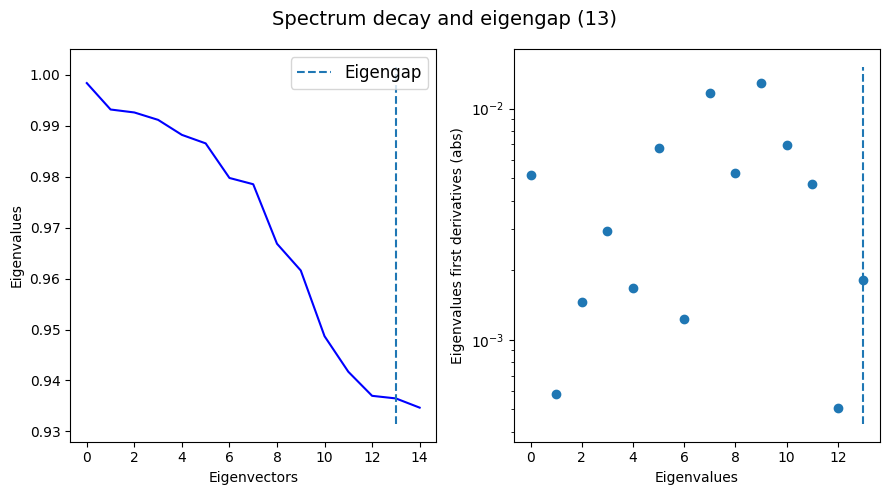

In [13]:
tp.pl.decay_plot(eig.eigenvalues)

The `transform()` method is responsible for fetching the specific result associated with the specified method. In this case, because we usde the default method 'DM', we'll get multiscaled diffusion maps, stored at `EigenDecomposition.dmaps`. The unscaled and unweighted eigenvectors are stored at `EigenDecomposition.eigenvectors`.

In [14]:
dmaps = eig.results()
dmaps.shape

(1797, 15)

Let's plot the first two diffusion components:

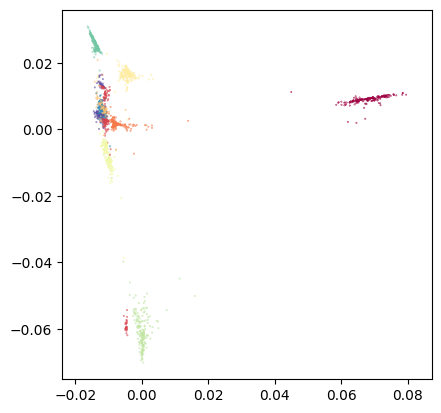

In [15]:
tp.pl.scatter(dmaps[:,0:2], labels=labels, pt_size=0.1)

And all the components to see how well they separate the classes:

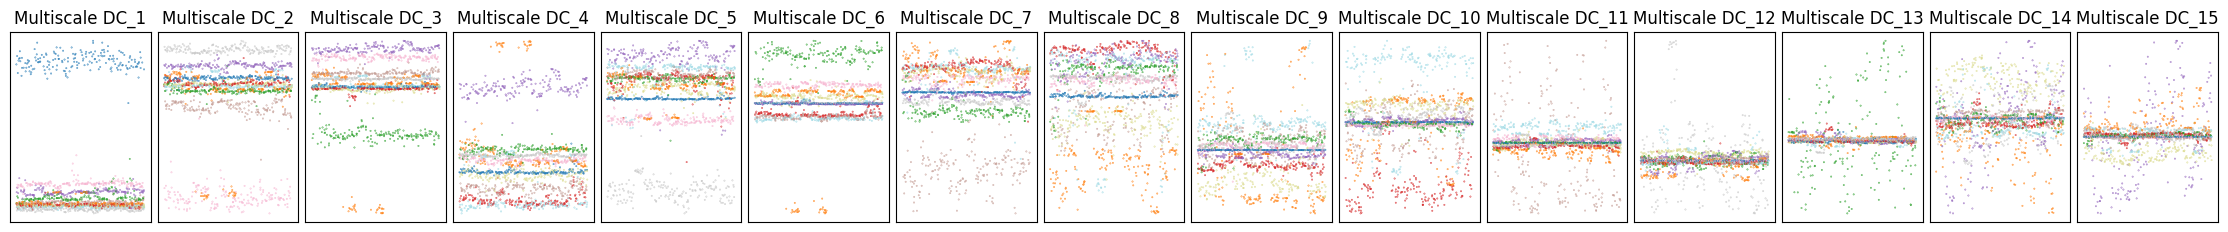

In [16]:
plt.figure(figsize=(9 * 2 + 5, 2))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)
plot_num = 1
for i in range(0, dmaps.shape[1]):
    plt.subplot(1, dmaps.shape[1], plot_num)
    plt.title('Multiscale DC_' + str(plot_num))
    plt.scatter(range(0, dmaps.shape[0]), dmaps[:,i], s=0.1, c=labels, cmap='tab20')
    plot_num += 1
    plt.xticks(())
    plt.yticks(())

As we can see, usually a large number of components is needed to sucessfully encode all the relevant structure present in the data. As a consequence, visualization of the first two or three components often is not the best way to explore the data. Instead, we can use these components to learn a new denoised similarity graph which carries all of this topological information and project it with a graph-layout optimization algorithm. For this, we'll use the `Projector` class, which wraps around different layout methods.

## The Projector class

The `topo.layout.Projector` class is an utility class which wraps around several graph-layout optimization methods for visualization. When using `TopOMetry` as a standalone library without further graph-layout libraries, it offers the Isomap, t-SNE and MAP (an adaptation of UMAP) methods. It handles the computation of the graph similarities, initialization, and overall compabilities of various methods with the adopted workflow. Current layout options are:

* ['Isomap'](https://doi.org/10.1126/science.290.5500.2319) - one of the first manifold learning methods
* ['t-SNE'](https://github.com/DmitryUlyanov/Multicore-TSNE) - a classic manifold learning method
* 'MAP'- a lighter adaptation of [UMAP](https://umap-learn.readthedocs.io/en/latest/index.html) 
* ['UMAP'](https://umap-learn.readthedocs.io/en/latest/index.html)
* ['PaCMAP'](http://jmlr.org/papers/v22/20-1061.html) (Pairwise-controlled Manifold Approximation and Projection) - for balanced visualizations
* ['TriMAP'](https://github.com/eamid/trimap) - dimensionality reduction using triplets
* 'IsomorphicMDE' - [MDE](https://github.com/cvxgrp/pymde) with preservation of nearest neighbors
* 'IsometricMDE' - [MDE](https://github.com/cvxgrp/pymde) with preservation of pairwise distances
* ['NCVis'](https://github.com/stat-ml/ncvis) (Noise Contrastive Visualization) - a UMAP-like method with blazing fast performance

NOTE: These are frankly quite direct to add, so feel free to make a feature request if your favorite layout method is not listed here.

For now, let's try to project some of the operators from the kernel and the eigenbasis we just learned.

We'll begin with the diffusion operator. Let's project it with Isomap and MAP:

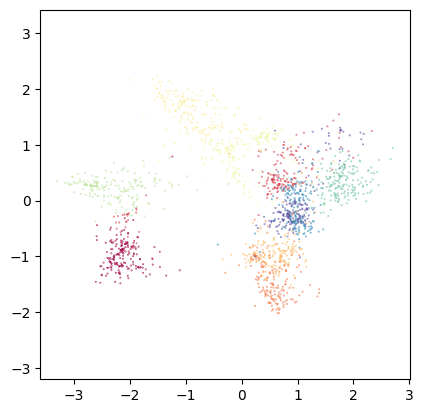

In [17]:
# Isomap from diffusion operator:
diff_op_isomap = tp.lt.Projector(projection_method='Isomap', metric='precomputed').fit_transform(my_kernel.P)

tp.pl.scatter(diff_op_isomap, labels=labels, pt_size=0.1)

This looks reasonable. However, optimizing the layout to preserve global distances rarely is a good option to visualize high-dimensional data. Let's try MAP, which focuses on local distances:

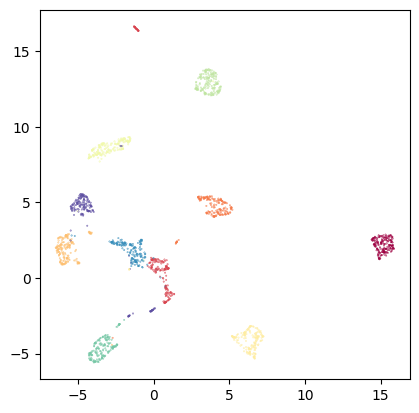

In [18]:
# MAP from diffusion operator:
diff_op_map = tp.lt.Projector(projection_method='MAP', metric='precomputed').fit_transform(my_kernel.P)

tp.pl.scatter(diff_op_map, labels=labels, pt_size=0.1)

I hope TopOMetry classes became more intuitive to you after this tutorial! You're free to either use the `TopOGraph` class, which orchestrates these classes into a comprehensive analysis, or to use these classes in a custom way as you see fit for your use case.

In the following tutorials, we'll see how to visualize distortions from the obtained embeddings using the Riemann metric, and how to quantify the preservation of local geometry.